In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the data into arrays
# first column of the data file is phase data
WHT_PhaseHalf = np.loadtxt("GD356WHT.dat", usecols=(0))
WHT_Phase = np.concatenate((WHT_PhaseHalf, WHT_PhaseHalf+1))
# second column of the data file is flux data
WHT_FluxHalf = np.loadtxt("GD356WHT.dat", usecols=(1))
WHT_Flux = np.concatenate((WHT_FluxHalf+1, WHT_FluxHalf+1))
# third column of the data file is flux error
WHT_ErrorHalf = np.loadtxt("GD356WHT.dat", usecols=(2))
WHT_Error = np.concatenate((WHT_ErrorHalf, WHT_ErrorHalf))

In [30]:
def mean_data(Phase, Flux, Error, bins):

    Phase_split = np.array_split(Phase, bins)
    Flux_split = np.array_split(Flux, bins)
    Error_split = np.array_split(Error, bins)

    meanPhase = [] * bins
    meanFlux = [] * bins
    meanError = [] * bins

    for i in range(bins):

        meanPhase_i = np.mean(Phase_split[i])
        meanFlux_i = np.sum(Flux_split[i] / (Error_split[i]**2))/ np.sum(1/(Error_split[i]**2))

        meanError_i = np.sqrt(1/np.sum(1/(Error_split[i]**2)))

        meanPhase.append(meanPhase_i)
        meanFlux.append(meanFlux_i)
        meanError.append(meanError_i)
        
    return meanPhase, meanFlux, meanError

meanPhase, meanFlux, meanError = mean_data(WHT_Phase, WHT_Flux, WHT_Error, 200)
meanPhase2, meanFlux2, meanError2 = mean_data(WHT_Phase, WHT_Flux, WHT_Error, 40)

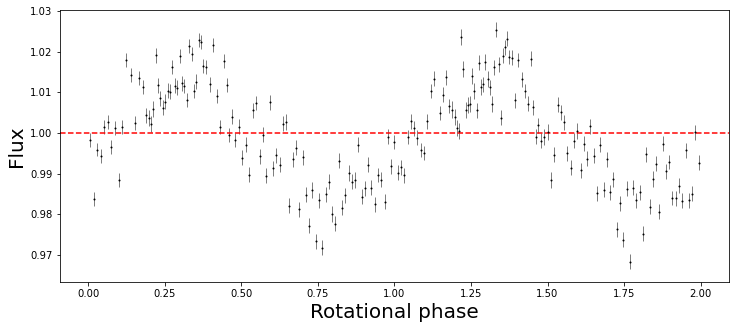

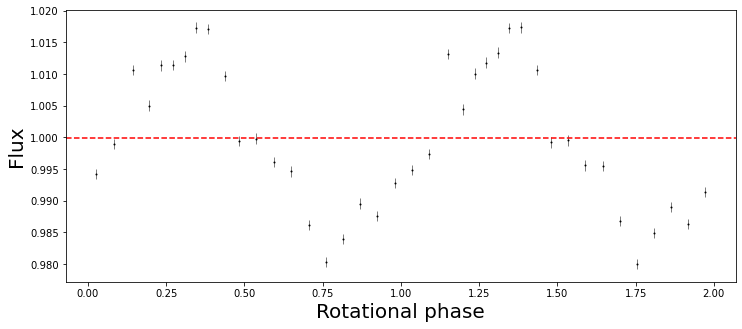

In [31]:
plt.figure(figsize=(12, 5))

plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=np.median(meanFlux), color='r', linestyle='--');

plt.figure(figsize=(12, 5))

plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase2, meanFlux2, yerr=meanError2, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=np.median(meanFlux), color='r', linestyle='--');

In [7]:
# importing the data into arrays
# first column of the data file is phase data
WHT_PhaseHalf2 = np.loadtxt("GD356WHT_Old.dat", usecols=(0))
WHT_Phase2 = np.concatenate((WHT_PhaseHalf2, WHT_PhaseHalf2+1))
# second column of the data file is flux data
WHT_FluxHalf2 = np.loadtxt("GD356WHT_Old.dat", usecols=(1))
WHT_Flux2 = np.concatenate((WHT_FluxHalf2+1, WHT_FluxHalf2+1))

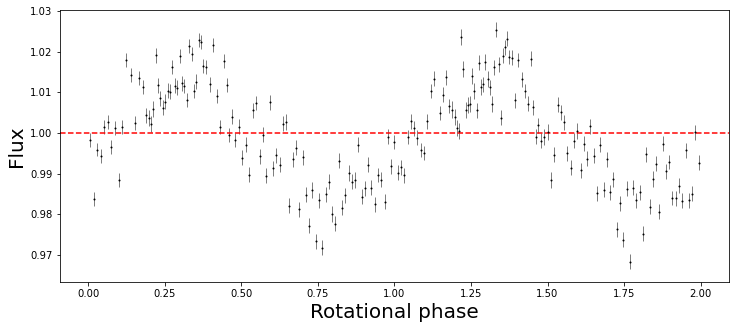

In [8]:
meanPhase, meanFlux, meanError = mean_data(WHT_Phase2, WHT_Flux2, WHT_Error, 200)

plt.figure(figsize=(12, 5))

plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=np.median(meanFlux), color='r', linestyle='--');

In [20]:
# importing the data into arrays
# first column of the data file is phase data
PTO_PhaseHalf = np.loadtxt("GD356PTO.dat", usecols=(0))
PTO_Phase = np.concatenate((PTO_PhaseHalf, PTO_PhaseHalf+1))
# second column of the data file is flux data
PTO_FluxHalf = np.loadtxt("GD356PTO.dat", usecols=(1))
PTO_Flux = np.concatenate((PTO_FluxHalf+1, PTO_FluxHalf+1))
# third column of the data file is flux error
PTO_ErrorHalf = np.loadtxt("GD356PTO.dat", usecols=(2))
PTO_Error = np.concatenate((PTO_ErrorHalf, PTO_ErrorHalf))

In [21]:
meanPhase2, meanFlux2, meanError2 = mean_data(PTO_Phase, PTO_Flux, PTO_Error, 200)

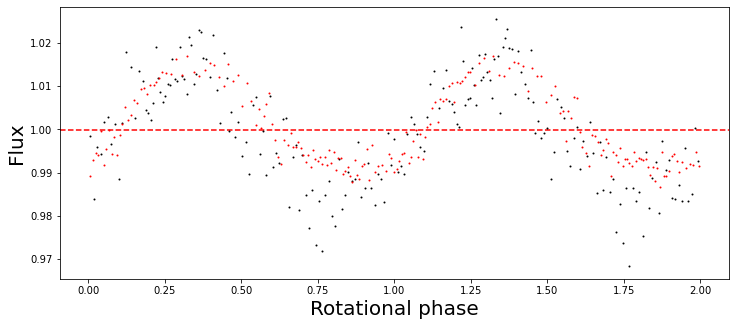

In [22]:
meanPhase, meanFlux, meanError = mean_data(WHT_Phase2, WHT_Flux2, WHT_Error, 200)

plt.figure(figsize=(12, 5))

plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=0, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.errorbar(meanPhase2, meanFlux2, yerr=0, color='red', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=np.median(meanFlux), color='r', linestyle='--');

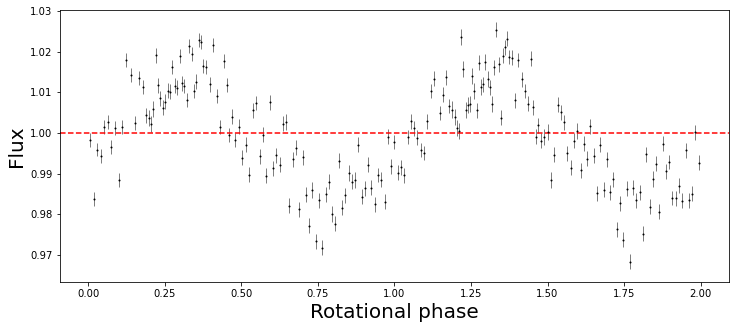

In [4]:
plt.figure(figsize=(12, 5))

plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=np.median(meanFlux), color='r', linestyle='--');

<Figure size 432x288 with 0 Axes>

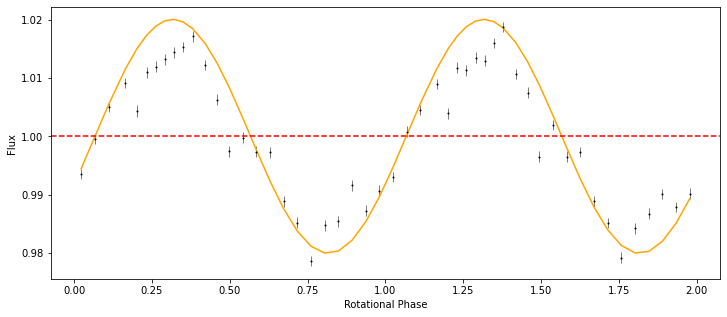

In [13]:
def sine_wave(meanPhase, meanFlux):
    
    N = int(len(meanFlux)/5)
    difference_array = np.absolute(np.subtract(meanFlux[:N],1)) 
    index = difference_array.argmin()

    amplitude = (np.amax(meanFlux) - np.amin(meanFlux))/2
    SineWave = (amplitude * np.sin((np.multiply(meanPhase,2*np.pi)) - (meanPhase[index]*2*np.pi))) + 1
    
    return SineWave, meanPhase[index]

SineWave, Tess_guess = sine_wave(meanPhase, meanFlux)

plt.figure()
plt.figure(figsize=(12, 5))
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.plot(meanPhase, SineWave, color='orange', marker='', linestyle='-', markersize=2)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

The amplitude of the fitted curve is 0.014622329539522236


<Figure size 432x288 with 0 Axes>

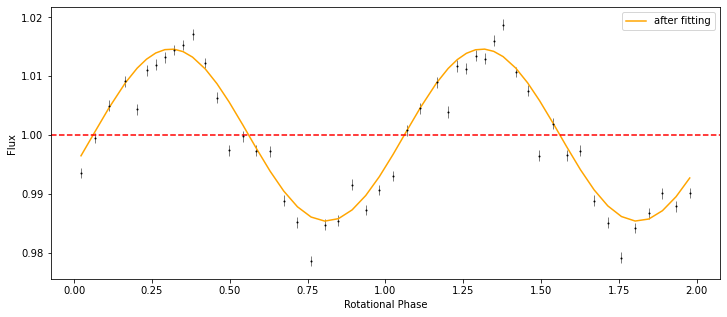

<Figure size 432x288 with 0 Axes>

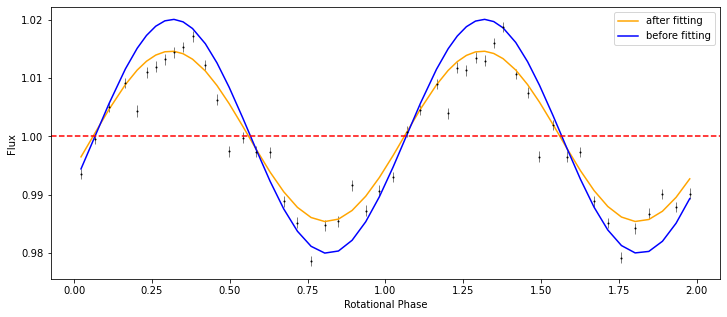

In [14]:
from scipy.optimize import leastsq

def least_squares(meanPhase, meanFlux, guess):
    
    t = np.multiply(meanPhase,2*np.pi)
    guess_mean = 1
    guess_phase = guess*2*np.pi
    guess_amp = np.amax(meanFlux)

    # Define the function to optimize, in this case, we want to minimize the difference
    # between the actual data and our "guessed" parameters
    optimize_func = lambda x: x[0]*np.sin(t-x[1]) + 1 - meanFlux
    est_amp, est_phase = leastsq(optimize_func, [guess_amp, guess_phase])[0]

    # recreate the fitted curve using the optimized parameters
    data_fit = est_amp*np.sin(t-est_phase) + 1
    
    print("The amplitude of the fitted curve is " + str(est_amp))
    
    return data_fit

data_fit = least_squares(meanPhase, meanFlux, Tess_guess)

plt.figure()
plt.figure(figsize=(12, 5))
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.plot(meanPhase, data_fit, label='after fitting', color='orange', marker='', linestyle='-')
plt.legend()
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

plt.figure()
plt.figure(figsize=(12, 5))
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.plot(meanPhase, data_fit, label='after fitting', color='orange', marker='', linestyle='-')
plt.plot(meanPhase, SineWave, label='before fitting', color='blue', marker='', linestyle='-', markersize=2)
plt.legend()
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [16]:
def chi_squared(raw_data, expected_data, error):
    
    residuals = (raw_data - expected_data)/error
    chi_squared = np.sum(residuals**2)
    
    return chi_squared

In [17]:
print("The reduced chi^2 value using the fitted line is " + str(chi_squared(meanFlux, data_fit, meanError)))
print("The reduced chi^2 value using the unfitted line is " + str(chi_squared(SineWave, data_fit, meanError)))

The reduced chi^2 value using the fitted line is 652.1356918770568
The reduced chi^2 value using the unfitted line is 951.3798760640801


In [18]:
652.1356918770568/50

13.042713837541136

In [32]:
peak = np.amax(meanFlux2)

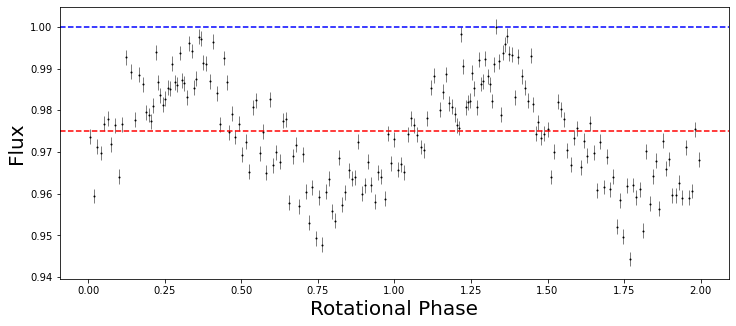

In [38]:
flux = meanFlux/np.amax(meanFlux)
flux_err = np.mean(meanError)/np.amax(meanFlux)

plt.figure(figsize=(12, 5))

plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='b', linestyle='--')
plt.axhline(y=np.mean(flux), color='r', linestyle='--');

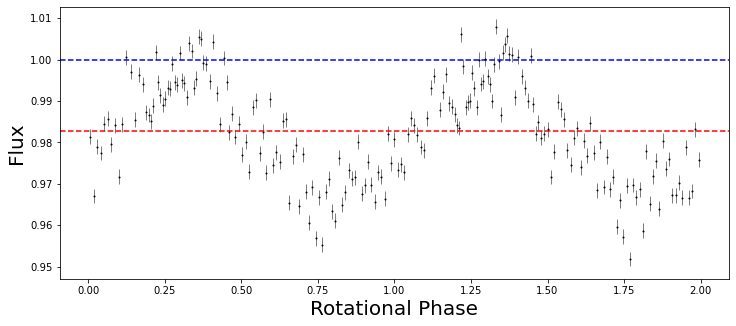

In [37]:
flux = meanFlux/peak
flux_err = np.mean(meanError)/peak

plt.figure(figsize=(12, 5))

plt.xlabel("Rotational phase", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='b', linestyle='--')
plt.axhline(y=np.mean(flux), color='r', linestyle='--');

In [40]:
import starry

In [42]:
# importing the data into arrays
# first column of the data file is phase data
TessPhaseHalf = np.loadtxt("GD356allTess.dat", usecols=(0))
TessPhase = np.concatenate((TessPhaseHalf, TessPhaseHalf+1))
# second column of the data file is flux data
TessFluxHalf = np.loadtxt("GD356allTess.dat", usecols=(1))
TessFlux = np.concatenate((TessFluxHalf+1, TessFluxHalf+1))
# third column of the data file is flux error
TessErrorHalf = np.loadtxt("GD356allTess.dat", usecols=(2))
TessError = np.concatenate((TessErrorHalf, TessErrorHalf))

In [44]:
meanPhase, meanFlux, meanError = mean_data(TessPhase, TessFlux, TessError, 200)

flux = meanFlux/np.amax(meanFlux)
flux_err = np.mean(meanError)/np.amax(meanFlux)
t = meanPhase
theta = np.multiply(meanPhase, 360)

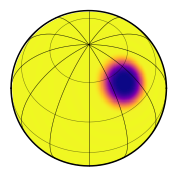

In [41]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=0.17549, radius=15.39599, lat=50.73618, lon=45.33106)
map.inc = 34.22757
map.show()

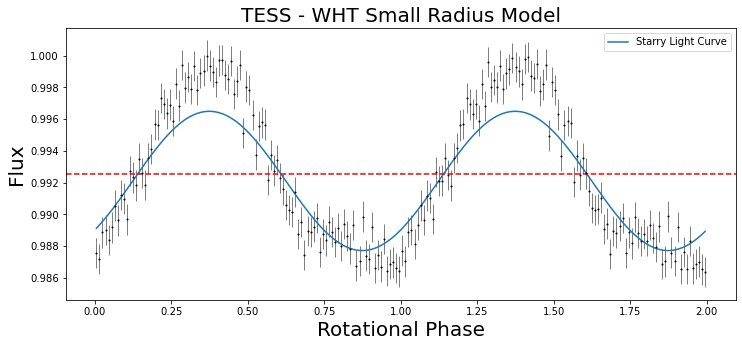

In [45]:
newFlux = map.flux(theta=theta)

plt.figure(figsize=(12, 5))

plt.title('TESS - WHT Small Radius Model', fontsize=20)
plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.mean(flux), color='r', linestyle='--');

In [46]:
map = starry.Map(ydeg=30)
map.spot(contrast=0.26244, radius=15.39599, lat=50.73618, lon=45.33106)
map.inc = 34.22757
#map.show()

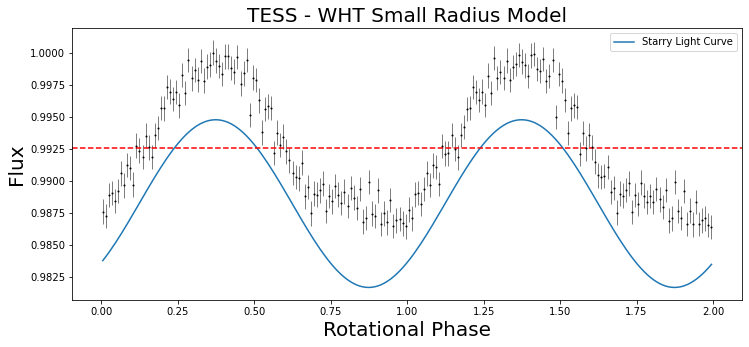

In [47]:
newFlux = map.flux(theta=theta)

plt.figure(figsize=(12, 5))

plt.title('TESS - WHT Small Radius Model', fontsize=20)
plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.mean(flux), color='r', linestyle='--');

In [50]:
starry.config.lazy = False

map = starry.Map(ydeg=30)
map.spot(contrast=0.17549, radius=15.39599, lat=50.73618, lon=45.33106)
map.inc = 34.22757
#map.show()

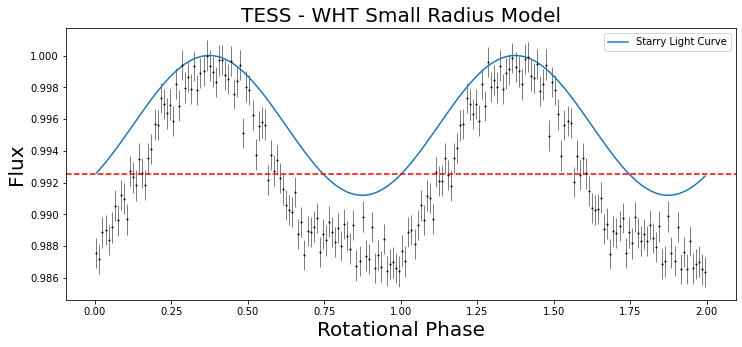

In [51]:
newFlux = map.flux(theta=theta)

newFlux = newFlux/np.amax(newFlux)

plt.figure(figsize=(12, 5))

plt.title('TESS - WHT Small Radius Model', fontsize=20)
plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=flux_err, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.mean(flux), color='r', linestyle='--');